Jesús Enrique Díaz Bernal Robinson Bours - A00227255

Activitad 4.1

En esta actividad tomé datos de las actividades de una persona por varios días. Estos contienen tiempo de ejercicio, lectura, uso de celular, trabajo, descanso y sueño. Con estos datos espero analizar específicamente las horas de sueño cada día.

In [ ]:
# Install dependencies as needed:
pip install kagglehub[pandas-datasets]
pip install pandas
pip install matplotlib
pip install fitter

In [53]:
# IMPORTS
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
from fitter import Fitter

DESCARGAR LA ÚLTIMA VERSIÓN DEL DATASET DE KAGGLE

In [12]:
# Save path of download
path = kagglehub.dataset_download("govindaramsriram/sleep-time-prediction", path='sleeptime_prediction_dataset.csv')

print("Path to dataset files:", path)

data = pd.read_csv(path)
print(data)

100%|██████████| 70.2k/70.2k [00:00<00:00, 601kB/s]

Path to dataset files: C:\Users\jusus\.cache\kagglehub\datasets\govindaramsriram\sleep-time-prediction\versions\1\sleeptime_prediction_dataset.csv
      WorkoutTime  ReadingTime  PhoneTime  WorkHours  CaffeineIntake  \
0            1.12         0.52       3.29       7.89          216.08   
1            2.85         0.49       4.22       5.03          206.18   
2            2.20         1.81       4.04       9.23           28.73   
3            1.80         0.50       1.62       7.68          276.77   
4            0.47         0.54       1.60       4.94          170.54   
...           ...          ...        ...        ...             ...   
1995         1.97         0.88       3.74       5.64          257.30   
1996         2.87         0.67       3.01       5.26          269.25   
1997         0.21         0.79       4.06       6.73          284.01   
1998         0.17         1.06       2.94       9.45          119.25   
1999         0.85         0.32       1.60       4.63         

CREAR EL HISTOGRAMA PARA GRAFICAR CON LAS HORAS DE SUEÑO

Aquí decidí agrupar en secciones de 1 hora

(array([  6.,   5.,   4., 578., 646., 477., 203.,  25.,   6.,   4.,   3.,
          4.,   4.,   5.,   1.,   7.,   5.,   8.,   4.,   5.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 <BarContainer object of 20 artists>)

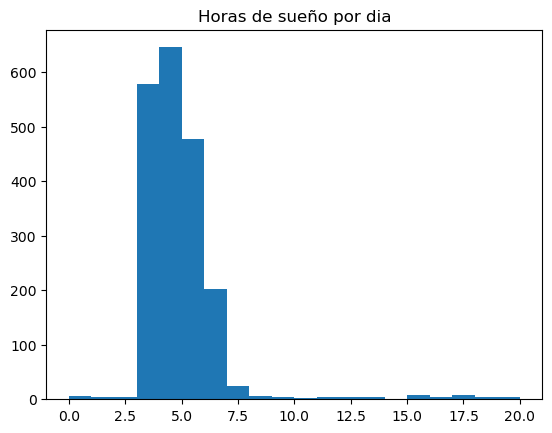

In [49]:
# Histogram
plt.title("Horas de sueño por dia")
plt.hist(data.SleepTime, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

El histograma se parece a un PDF (Probability Density Function) ya que la probabilidad sube mucho en un punto y baja a los lados. Creo que esto quedaría bien para modelar con machine learning usando un modelo de Gaussian. Sin embargo, vamos a comprobar con el resultado de la librería fitter. 

FITTER

Usar la librería fitter para ver que distribución recomienda.
Esto puede tardar un rato ya que hay muchos datos

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
fisk,0.136624,1184.179029,1200.981736,inf,0.063793,1.611725e-07
genlogistic,0.138243,1354.023289,1370.825996,inf,0.061710,4.600361e-07
burr,0.141078,1165.720533,1188.124143,inf,0.054042,1.618850e-05
mielke,0.141078,1165.721506,1188.125116,inf,0.054042,1.618656e-05
alpha,0.145954,1252.508773,1269.311480,inf,0.070763,3.742116e-09


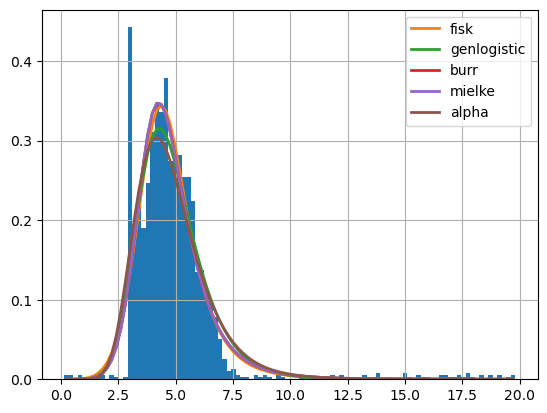

In [63]:
f = Fitter(data.SleepTime)
f.fit()

f.summary()

PARAMETROS

De los datos arrojados por fitter podemos ver que los mejores modelos de scipy para el dataset que use son fisk y genlogistic.



CONCLUSIÓN

Los modelos pueden graficar de forma muy precisa los datos que se entregan y pueden ser utilizados para predecir nuevos datos. Esto puede ser aplicado en con muchos otros tipos de datos para entender  y sacar conclusiones de ellos 